In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
fedData = pd.read_csv("fedData.csv", index_col="Date", parse_dates=True)#, infer_datetime_format=True)
fedData.rename(columns={col: col.replace(" ($ Mil)","") for col in fedData.keys()}, inplace = True)
fedData["$\\frac{Gold}{Base}$"] = fedData["Gold at Fed (mil)"].div(fedData["High Powered Money (mil)"])
fedData[:"1936"].head()

,Gold at Fed (mil),High Powered Money (mil),High Powered Money Less Gold (mil),Total,Gold Multiplier (Base),Gold Multiplier (M1),Bills Discounted,Bills Bought,U.S. Government Securities,All Other,Comm Paper,NYFRB Discount Window,Price Level (1913=100),Annualized Inflation,12 Month MA,Weighted Monthly Inflation,12 Month MA Weighted Inflation,$\frac{Gold}{Base}$
Date,,,,,,,,,,,,,,,,,,
1918-01-01,2873,5513,2640,1170,1.918900,6.297250,612,266,149,143,5.57,4.25,144.0,0.125000,NaN,NaN,NaN,0.521132
1918-02-01,2875,5708,2833,1143,1.985391,6.193043,529,288,185,141,5.68,4.25,146.0,0.123077,NaN,0.166667,NaN,0.503679
1918-03-01,2878,5813,2935,1263,2.019805,6.410007,537,315,271,140,5.88,4.25,147.0,0.113636,NaN,0.082192,NaN,0.495097
1918-04-01,2879,5892,3013,1381,2.046544,6.434873,751,313,173,144,5.91,4.51,149.0,0.095588,NaN,0.163265,NaN,0.488629
1918-05-01,2885,5855,2970,1412,2.029463,6.211785,897,278,86,151,5.88,4.56,151.0,0.086331,NaN,0.161074,NaN,0.492741


In [2]:
bank_data = pd.read_excel("BankData.xlsx", index_col = [0], parse_dates = True)
bank_data["Total Loans and Investments\n(No Broker Loans)"] = bank_data["Total Loans and Investments"].sub(bank_data["Total Broker Loans"])


In [3]:
def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()
    return df
GD_dict = {"Dow Jones":"M1109BUSM293NNBR",
           "$CPI^{-1}$": "CUUR0000SA0R",
            "Federal Surplus": "FYFSD",
           "GDP":"FYGDP",
           "Industrial Poduction":"INDPRO",
           "Total Deposits ($ Mil)": "X02DT",
           "# Banks": "BNKTTL"}
           

In [4]:
diff = 12
freq = "M"
start = datetime.datetime(1913, 1, 1)
# end = datetime.datetime(2019, 12, 31)
end =datetime.datetime.today()
GD_data = gather_data(GD_dict, start, 
          end = end, freq = freq)
GD_data["CPI"] = GD_data["$CPI^{-1}$"].pow(-1)
GD_data["CPI"] = GD_data["CPI"].div(GD_data["CPI"].iloc[0])
GD_data["GDP"] = GD_data["GDP"].interpolate(method='polynomial', order=3).mul(1000)
GD_data["Federal Surplus"] = GD_data["Federal Surplus"].interpolate(method='polynomial', order=3)   
GD_data["$\\frac{Surplus}{GDP}$"] =  GD_data["Federal Surplus"].div(GD_data["GDP"])
GD_data = GD_data.resample("MS").mean()
GD_data.head()

,Dow Jones,$CPI^{-1}$,Federal Surplus,GDP,Industrial Poduction,Total Deposits ($ Mil),# Banks,CPI,$\frac{Surplus}{GDP}$
DATE,,,,,,,,,
1914-12-01,55.00,984.3,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
1915-01-01,56.55,987.6,NaN,NaN,NaN,21894.0,26511.0,0.996659,NaN
1915-02-01,56.00,994.2,NaN,NaN,NaN,NaN,NaN,0.990042,NaN
1915-03-01,58.30,1004.4,NaN,NaN,NaN,NaN,NaN,0.979988,NaN
1915-04-01,66.45,994.2,NaN,NaN,NaN,NaN,NaN,0.990042,NaN


In [5]:
for key, val in bank_data.items():
    GD_data[key] = val

norm = GD_data.copy()
for key in norm:
    norm[key] = norm[key].div(norm[key].loc["1929-10-01"])

C:\Users\JLCat\AppData\Local\Temp\ipykernel_496\3301542634.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val*100)) + "%" for val in ax.get_yticks()], fontsize = 26)


,Total Broker Loans,Dow Jones,Total Loans and Investments
Total Broker Loans,1.000000,0.259515,0.378757
Dow Jones,0.259515,1.000000,-0.302590
Total Loans and Investments,0.378757,-0.302590,1.000000


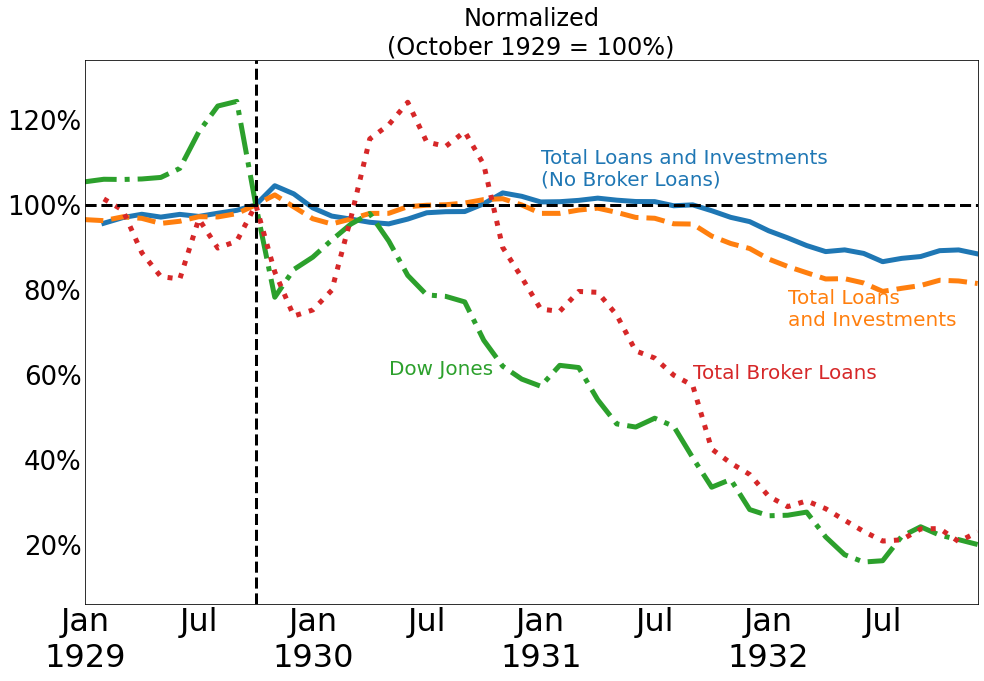

In [6]:
plt.rcParams['axes.ymargin'] = 0.09
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({"font.size":32})
fig, ax = plt.subplots(figsize = (16,10))
plot_vars = {"Total Loans and Investments\n(No Broker Loans)":"-",
             "Total Loans and Investments":"--",
             "Dow Jones": "-.",
             "Total Broker Loans":":"}
for var, ls in plot_vars.items():
    
    norm[var].loc["1929":"1932"].plot.line(ax = ax,
                        linewidth = 5,
                        ls = ls)
# plt.legend(fontsize = 17)
# ax2.set_ylim(0,.15)
plt.axvline("1929-10-01",
         color = "k", 
         ls = "--",
         linewidth = 3)
plt.axhline(1, linewidth = 3, ls = "--", color = "k")
ax.text("1931-01-01", 1.045, "Total Loans and Investments\n(No Broker Loans)", fontsize = 20, color = "C0")
ax.text("1932-2-01", .715, "Total Loans\nand Investments", fontsize = 20, color = "C1")
ax.text("1930-05-01", .6, "Dow Jones", fontsize = 20, color = "C2")
ax.text("1931-9-01", .59, "Total Broker Loans", fontsize = 20, color = "C3")
ax.set_yticklabels([str(int(val*100)) + "%" for val in ax.get_yticks()], fontsize = 26)
ax.tick_params('both', length=0, which='both')
ax.set_title("Normalized\n(October 1929 = 100%)", fontsize = 24)
ax.set_xlabel("")
norm[["Total Broker Loans", "Dow Jones", "Total Loans and Investments"]].diff().corr()

['Bills Discounted', 'Bills Bought', 'U.S. Government Securities', 'All Other']


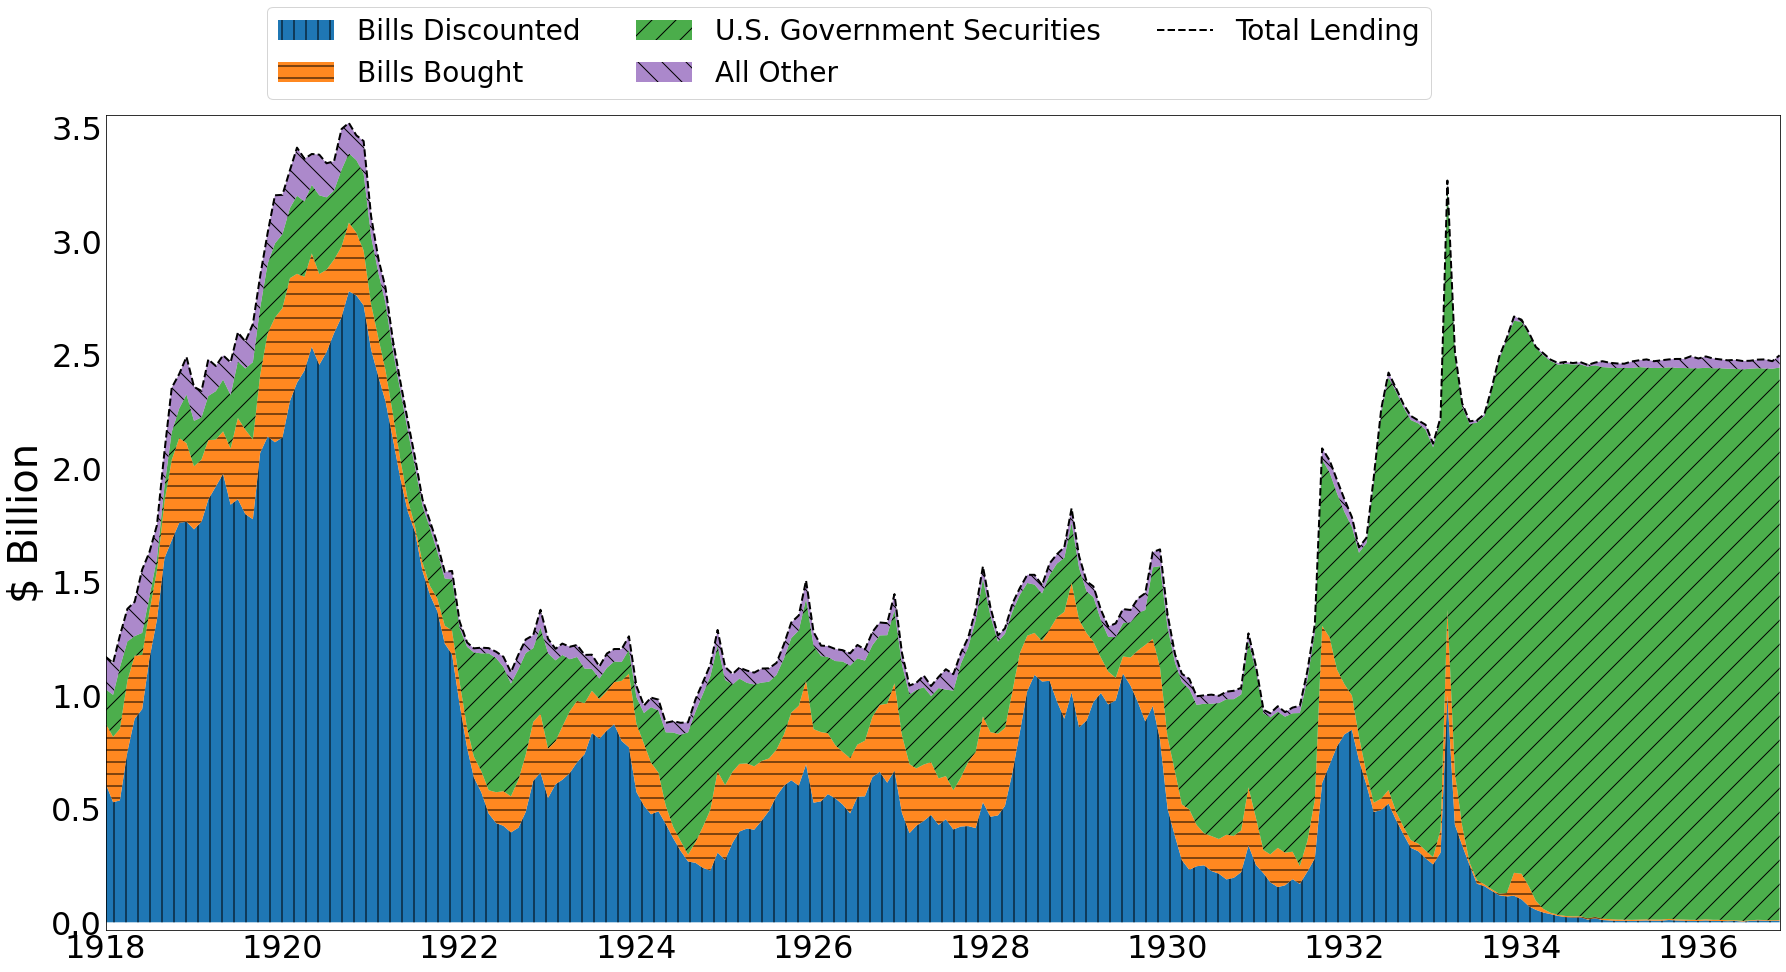

In [42]:
def stack_hatch(df, total_var = None, ylabel = "$ Trillion", 
                hatches = ['|', '-', '/', '\\', '+',  'O', '.', '*'], 
                loc = "upper left",
                colors = ["C0", "C1", "C2", "C4", "C5", "C6", "C7","C8", "C9"],
                ncol = 2):
    keys = list(df.keys())
    keys.remove(total_var)
    print(keys)
    fig, ax = plt.subplots(figsize = (30,15))
    for i in range(len(keys)):
        key = keys[i]
        if i > 0:
            for j in range(i):
                if j == 0:
                    base = df[keys[j]] 
                else:
                    base = base.add(df[keys[j]])
            ax.fill_between(df.index, base, df[key].add(base),
                            facecolor = colors[i],
                            hatch=hatches[i], 
                            alpha = 1 - i * .075, 
                            label = key)
            
        else:
            ax.fill_between(df.index, [0] * len(df.index), df[key],facecolor = colors[i],
                                             hatch=hatches[i], label = key)
            
    if total_var != None:
        ax.plot(df[total_var], label = total_var, linewidth = 2, linestyle = "--",  color = "k")
    ax.legend(loc = loc, ncol = ncol, fontsize = 28, bbox_to_anchor = (.8,1.15))
    ax.set_ylabel(ylabel, fontsize = 40)
    ax.tick_params('both', length=0, which='both')
    return fig, ax
    


plot_vars = ["Bills Discounted", "Bills Bought", "U.S. Government Securities", "All Other"]
plot_data = fedData[plot_vars].dropna().div(1000)
plot_data["Total Lending"] = plot_data.sum(axis = 1)
total_var = "Total Lending"

fig, ax = stack_hatch(plot_data[plot_vars + [total_var]], total_var, ylabel = "$ Billion", loc = "upper right",ncol = 3)

['High Powered Money Less Gold', 'Gold at Fed']


C:\Users\JLCat\AppData\Local\Temp\ipykernel_496\2022557124.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y / 1000)) for y in ax.get_yticks()])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_496\2022557124.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([str(round(y * 100, 2)) + "%" for y in ax2.get_yticks()])


Text(0, 0.5, '$\\frac{Gold}{Base}$')

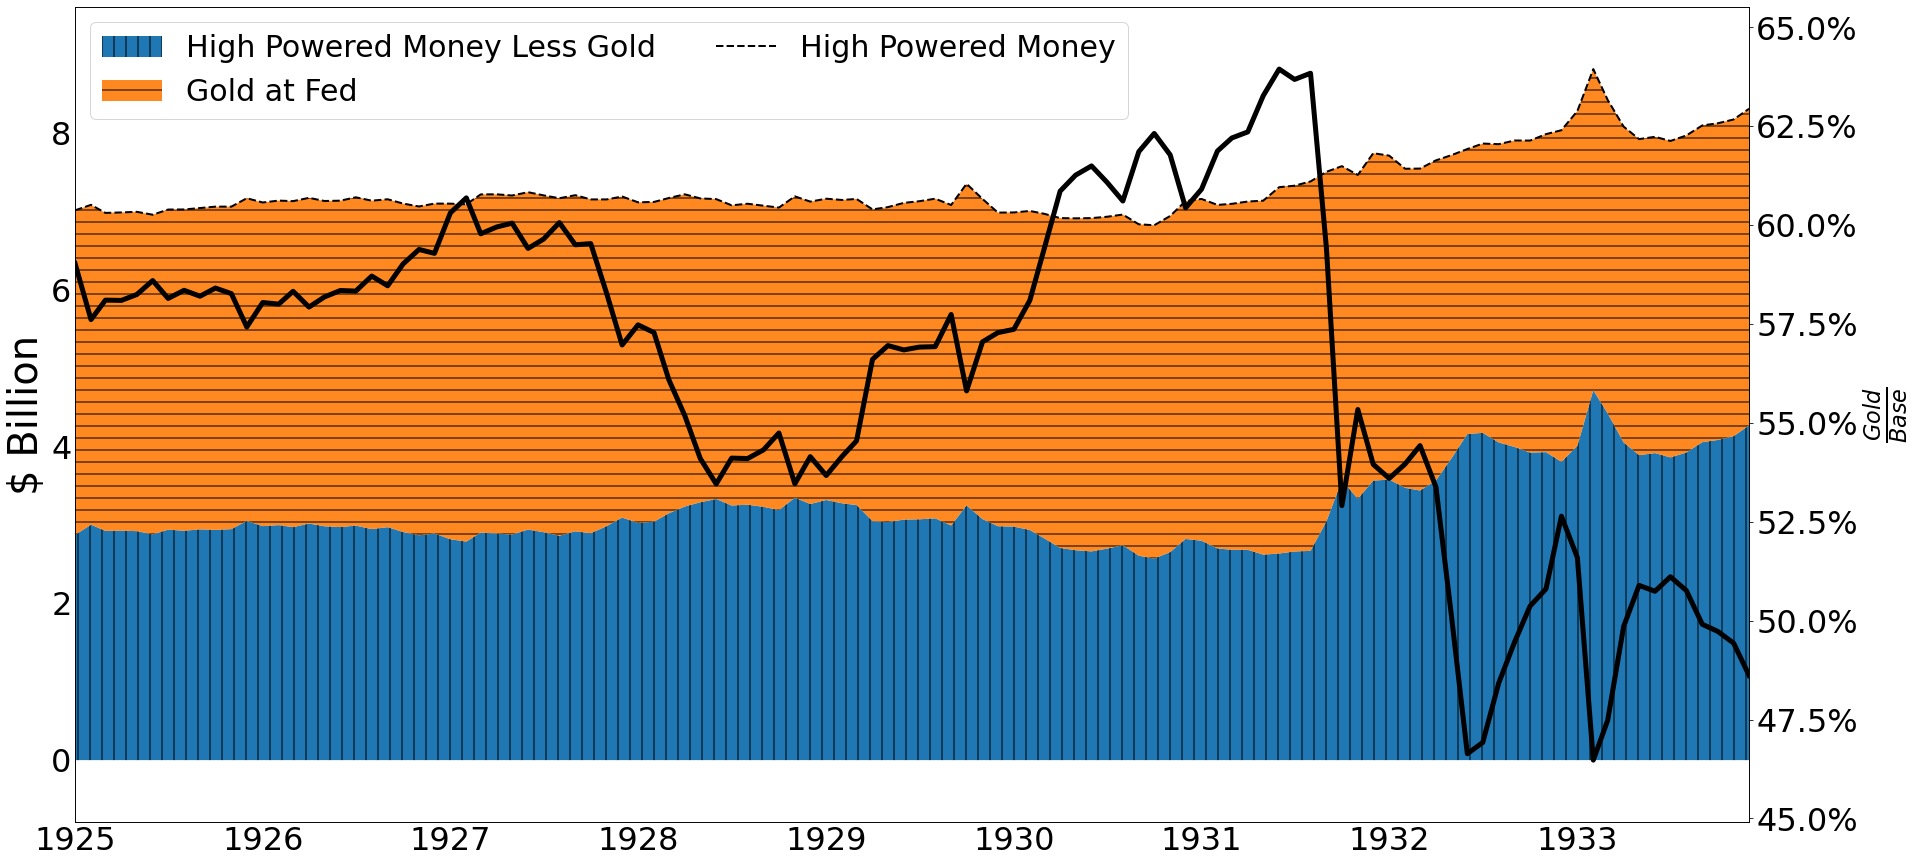

In [8]:
plot_df = fedData[["High Powered Money (mil)", "High Powered Money Less Gold (mil)", "Gold at Fed (mil)"]].loc["1925":"1933"]
plot_df.rename(columns = {name:name.replace(" (mil)", "") for name in plot_df.keys()}, inplace = True)
fig, ax = stack_hatch(plot_df, total_var = "High Powered Money", ylabel = "$ Billion")
ax2 = ax.twinx()
ax2.plot(plot_df.index, fedData["$\\frac{Gold}{Base}$"].loc["1925":"1933"], linewidth = 5, color = "k")
ax.set_yticklabels([str(round(y / 1000)) for y in ax.get_yticks()])
ax2.set_yticklabels([str(round(y * 100, 2)) + "%" for y in ax2.get_yticks()])
ax2.set_ylabel("$\\frac{Gold}{Base}$")

In [22]:
def bil_to_mil(series):
    return series* 10**3

data_codes  = {# Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               "Interest on Reserve Balances":"IORB",

               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }
               
# Select start and end dates
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
data = gather_data(data_codes = data_codes, start = start, 
                   end = end, freq = "W")
data["Interest on Reserves"] = data["Interest on Excess Reserves"]
data["Interest on Reserves"].loc["2021-08":] = data["Interest on Reserve Balances"].loc["2021-08":]

bil_to_mil_list  = ["Balance Sheet: Total Reserves ($ Mil)",
                    "Balance Sheet: Other Deposits ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = bil_to_mil(data[key])

In [32]:
plt.rcParams['axes.ymargin'] = 0.01
plt.rcParams['axes.xmargin'] = 0.00
plt.rcParams.update({"font.size":32})


['U.S. Treasuries Held Outright', 'Mortgage-Backed Securities', 'Other Securities', 'Direct Lending and Central Bank Liquidity Swaps', 'Repos', 'Unamortized Security Premiums', 'Other']


(<Figure size 2160x1080 with 1 Axes>, <AxesSubplot:ylabel='$ Trillion'>)

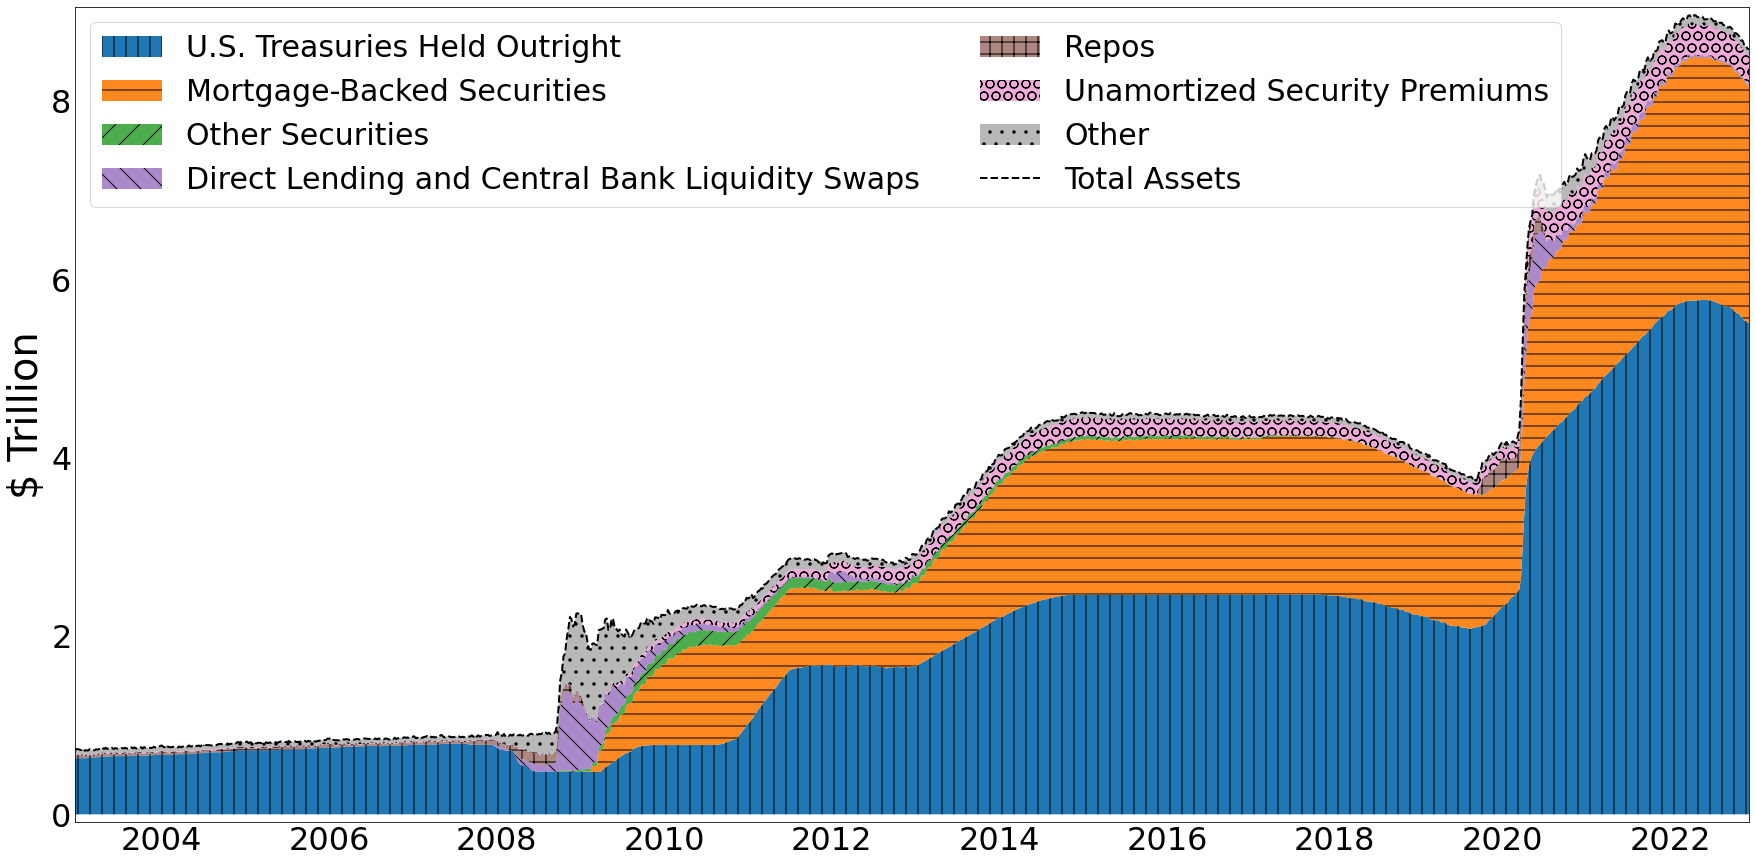

In [33]:
data["Balance Sheet: Direct Lending and Central Bank Liquidity Swaps"] =\
    data["Balance Sheet: Central Bank Liquidity Swaps ($ Mil)"].add(
    data["Balance Sheet: Direct Lending ($ Mil)"])
data["Balance Sheet: Other Securities"] = data["Balance Sheet: Securities Held Outright ($ Mil)"].sub(
    data["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)"]).sub(
    data["Balance Sheet: Mortgage-Backed Securities ($ Mil)"])
data["Balance Sheet: Other"] = data["Balance Sheet: Total Assets ($ Mil)"].sub(
    data["Balance Sheet: Securities Held Outright ($ Mil)"]).sub(
    data["Balance Sheet: Direct Lending and Central Bank Liquidity Swaps"]).sub(
    data["Balance Sheet: Repos ($ Mil)"]).sub(
    data["Balance Sheet: Unamortized Security Premiums ($ Mil)"])

account_vars = ["U.S. Treasuries Held Outright",
               "Mortgage-Backed Securities",
               "Other Securities",
               "Direct Lending and Central Bank Liquidity Swaps",
               "Repos",
               "Unamortized Security Premiums",
               "Other"]
plot_data = data.rename(columns = {
    key: key.replace("Balance Sheet: ", "").replace(" ($ Mil)", "") for key in data.keys()})
for key, val in plot_data.items():
        plot_data[key] = val.div(10**6)

total_var = "Total Assets"
stack_hatch(plot_data[account_vars + [total_var]], total_var)

['Federal Reserve Notes Outstanding', 'U.S. Treasury General Account', 'Deposits from Dep. Institutions', 'Other Deposits', 'Reverse Repos', 'Other']


(<Figure size 2160x1080 with 1 Axes>, <AxesSubplot:ylabel='$ Trillion'>)

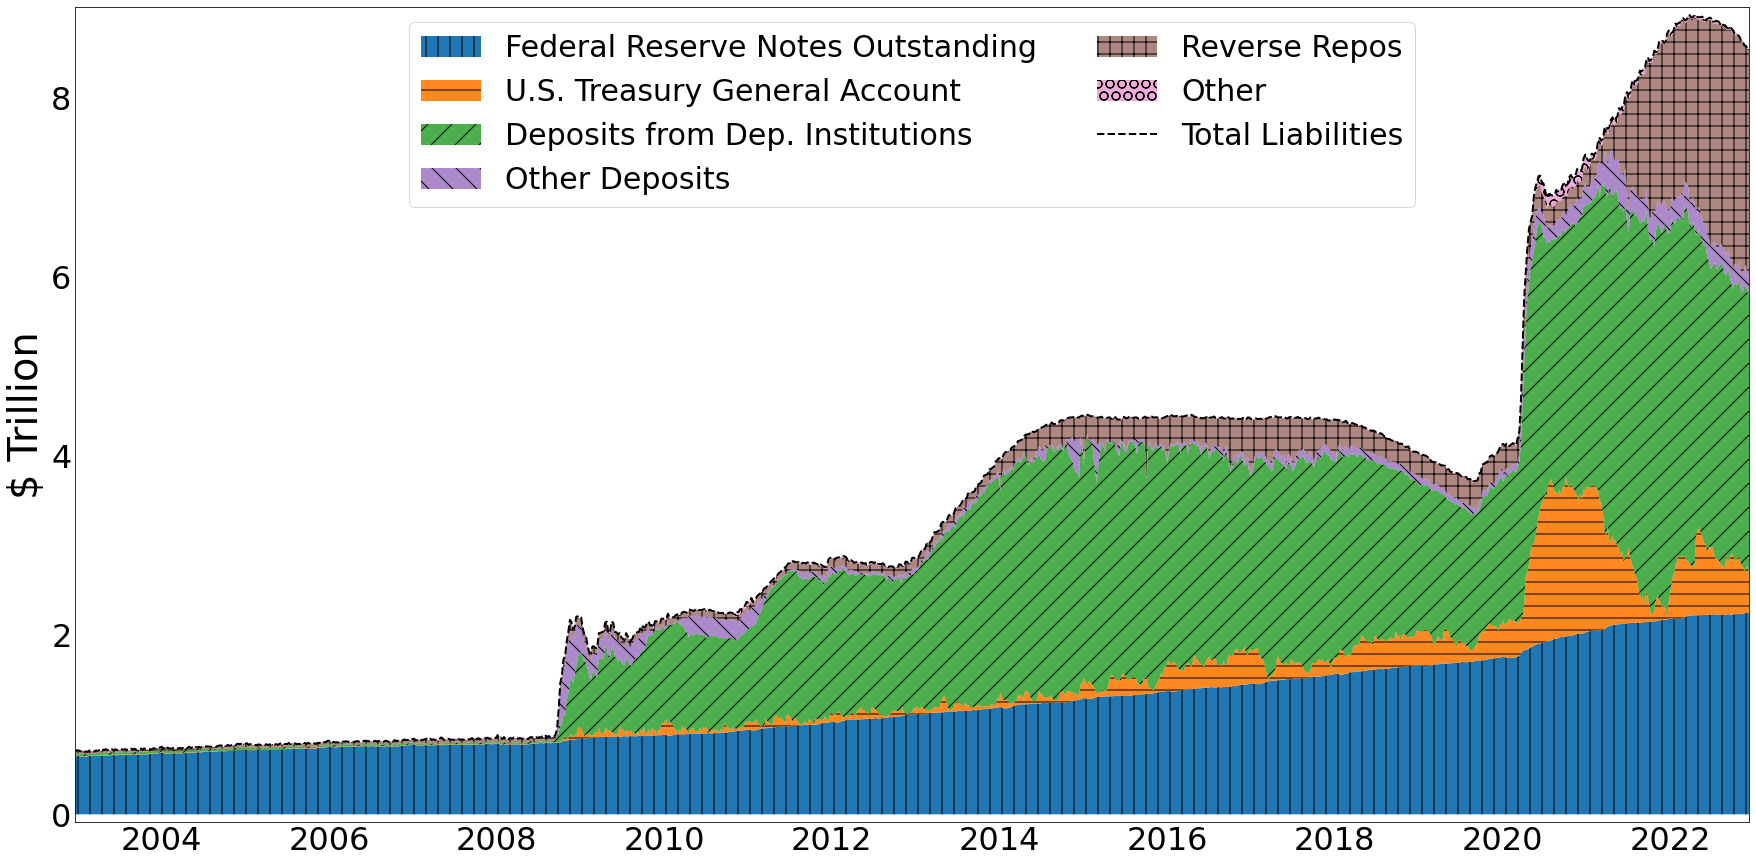

In [34]:
data["Balance Sheet: Other Deposits ($ Mil)"] = data["Balance Sheet: All Deposits ($ Mil)"].sub(
    data["Balance Sheet: U.S. Treasury General Account ($ Mil)"]).sub(
    data["Balance Sheet: Deposits from Dep. Institutions ($ Mil)"])
data["Balance Sheet: Other"]= data["Balance Sheet: Total Liabilities ($ Mil)"].sub(
    data["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)"]).sub(
    data["Balance Sheet: U.S. Treasury General Account ($ Mil)"]).sub(
    data["Balance Sheet: Deposits from Dep. Institutions ($ Mil)"]).sub(
    data["Balance Sheet: Other Deposits ($ Mil)"]).sub(
    data["Balance Sheet: Reverse Repos ($ Mil)"])

account_vars = ["Federal Reserve Notes Outstanding",
                "U.S. Treasury General Account",
                "Deposits from Dep. Institutions",
                "Other Deposits",
                "Reverse Repos",
                "Other"]

plot_data = data.rename(columns = {
    key: key.replace("Balance Sheet: ", "").replace(" ($ Mil)", "") for key in data.keys()})
for key, val in plot_data.items():
        plot_data[key] = val.div(10**6)
        0
total_var = "Total Liabilities"

stack_hatch(plot_data[account_vars + [total_var]], total_var, loc = "upper center")

C:\Users\JLCat\AppData\Local\Temp\ipykernel_496\3058134291.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val)) + "%" for val in ax.get_yticks()])


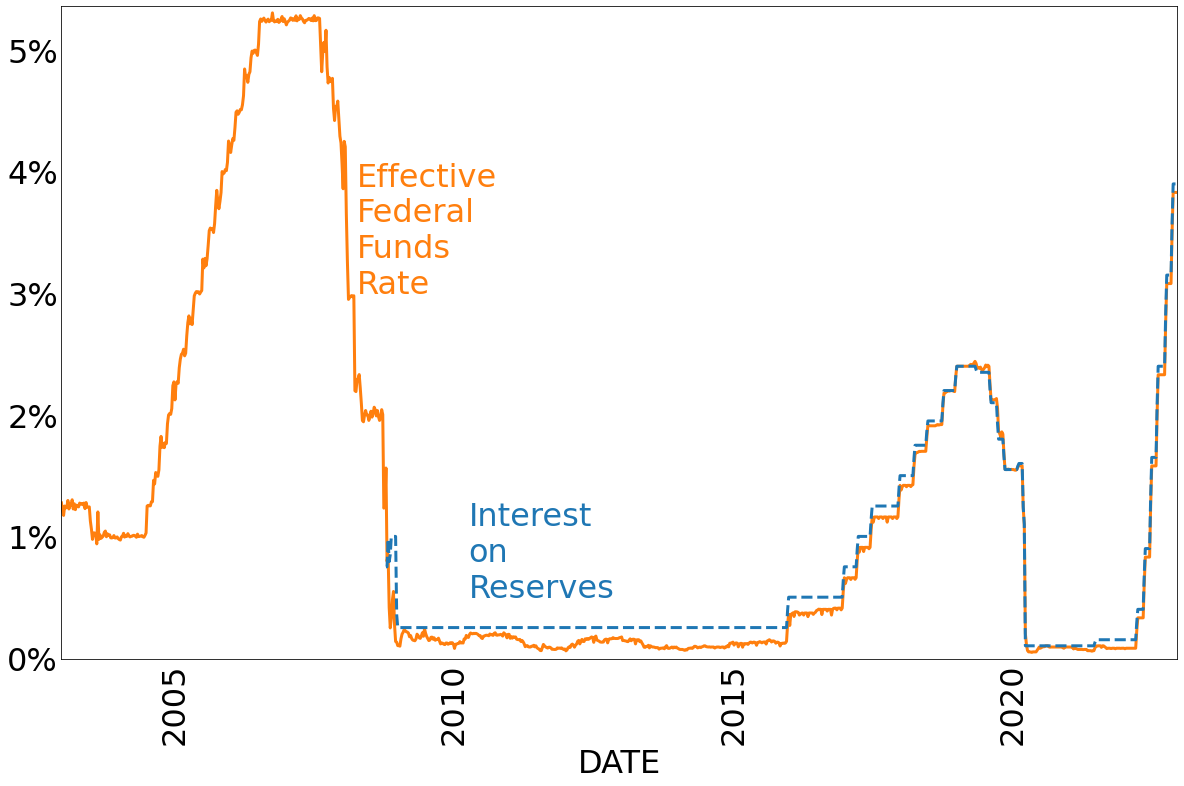

In [35]:
interest_vars = ["Effective Federal Funds Rate",
                  "Interest on Reserves"]
# plot_lines(data[interest_vars], linewidth = 3)        
fig, ax = plt.subplots(figsize = (20,12))
data[[interest_vars[0]]].plot(ax= ax, legend = False, linewidth = 3, color = "C1")
data[[interest_vars[1]]].loc["2008-10-08":].plot(ax= ax, 
                                                 legend = False, 
                                                 ls = "--", linewidth = 3, color = "C0")
ax.text("2008-04", 3, interest_vars[0].replace(" ","\n"), color = "C1")
ax.text("2010-04", .5, interest_vars[1].replace(" ","\n"), color = "C0")

ax.set_yticklabels([str(int(val)) + "%" for val in ax.get_yticks()])
plt.xticks(rotation = 90)
ax.tick_params('both', length=0, which='both')

plt.show()